C:\Users\spide\AppData\Local\Temp\ipykernel_21132\3827144027.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


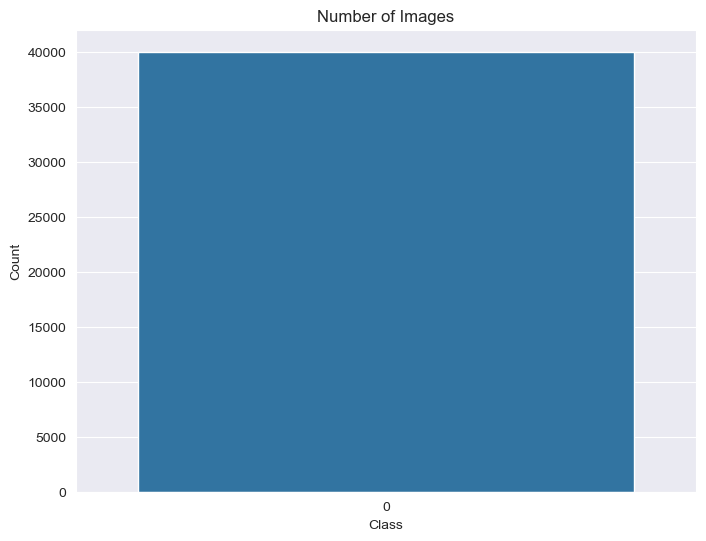

(-0.5, 119.5, 119.5, -0.5)

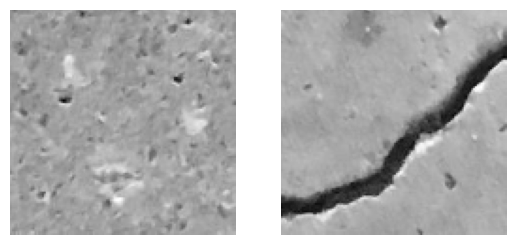

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Negative', 'Positive']
img_size = 120

def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

dataset = read_images(r"C:\Users\spide\Desktop\New folder\crack dataset")

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(dataset[:, 1])
ax.set_title("Number of Images")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

plt.show()


x = []
y = []

for feature, label in dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

plt.subplot(1, 2, 1)
plt.imshow(x[1000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[30000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad

model = Sequential()
model.add(Conv2D(64, 3, padding="same", activation="relu", input_shape=x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 120, 120, 64)      640       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 60, 60, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 128)      

In [9]:
opt = Adam(lr=1e-5)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history = model.fit(x, y, epochs = 15, batch_size = 128, validation_split = 0.25, verbose=1)kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk

Epoch 1/15
235/235 [==============================] - 547s 2s/step - loss: 0.1106 - accuracy: 0.9485 - val_loss: 0.0778 - val_accuracy: 0.9719
Epoch 2/15
235/235 [==============================] - 658s 3s/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0419 - val_accuracy: 0.9864
Epoch 3/15
235/235 [==============================] - 1730s 7s/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.0366 - val_accuracy: 0.9893
Epoch 4/15
235/235 [==============================] - 531s 2s/step - loss: 0.0112 - accuracy: 0.9966 - val_loss: 0.0863 - val_accuracy: 0.9792
Epoch 5/15
235/235 [==============================] - 476s 2s/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.0110 - val_accuracy: 0.9962
Epoch 6/15
235/235 [==============================] - 422s 2s/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0358 - val_accuracy: 0.9870
Epoch 7/15
235/235 [==============================] - 443s 2s/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0075 - val_accuracy: 0.997

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


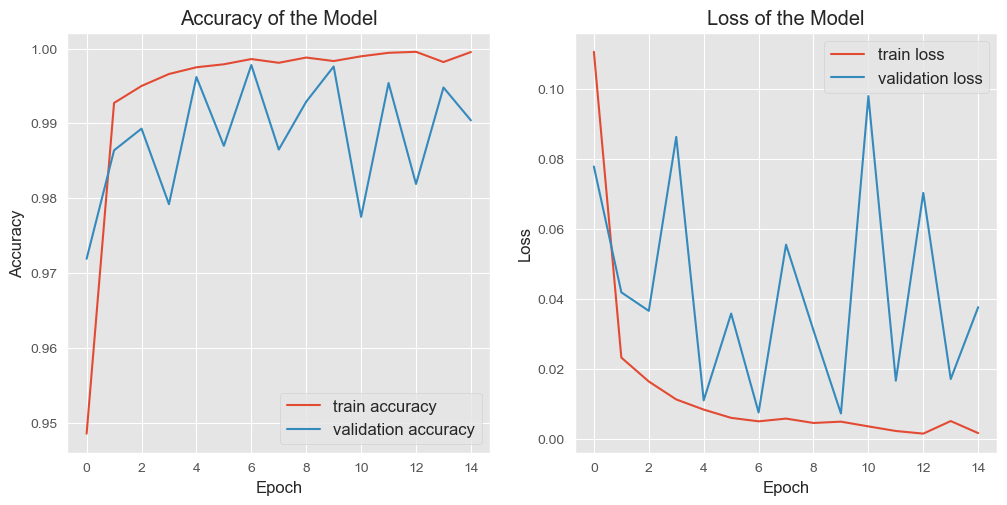

In [11]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted probabilities
predictions = model.predict(x)
predicted_labels = predictions.argmax(axis=1)

# Print classification report
print(classification_report(y, predicted_labels, target_names=['Negative', 'Positive']))

# Print confusion matrix
cm = confusion_matrix(y, predicted_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


NameError: name 'model' is not defined